In [ ]:
from google.colab import files
uploded = files.upload()

Saving Use Case 5.csv to Use Case 5.csv


In [ ]:
import pandas as pd
data = pd.read_csv("Use Case 5.csv")

In [ ]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Read data

data = pd.read_csv("Phone Transcript Data.csv", encoding="latin1")

In [ ]:
# Preprocessing of text

def preprocessed_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r"[^a-zA-Z\s]", "", text)

        # Return preprocessed text
        return text
    else:
        # Return empty string for non-string values
        return ""

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

# Tata column
data.columns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
data = data.rename(columns={'CASEDESCRIPTIONTEXT':'Comment'})

# Preprocess the text column
data["preprocessed_text"] = data["Comment"].apply(preprocessed_text)
comments = data['preprocessed_text'].tolist()


In [ ]:
# Convert comments to TF-IDF vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments)
# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

best_num_clusters = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg:.3f}")
# Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)
# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels
# Display the DataFrame with cluster labels
print(data)

In [ ]:
# Export the DataFrame to a new CSV file
output_csv_path = "/content/output_clusters.csv"  # Change the output path as needed
data.to_csv(output_csv_path, index=False)

print(f"Clustered comments exported to {output_csv_path}")

Clustered comments exported to /content/output_clusters.csv


K-means with principal component analyses

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Apply Principal Component Analysis (PCA) to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components as needed
X_pca = pca.fit_transform(X.toarray())

# Initialize variables to store best results
best_num_clusters = 0
best_silhouette_avg = -1  # Initialize with a default value

for n_clusters in range(2, 8):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_pca)  # Apply K-Means to PCA-transformed data
    silhouette_avg = silhouette_score(X_pca, cluster_labels)

print(f"For {n_clusters} clusters, silhouette score: {silhouette_avg:.3f}")

if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_num_clusters = n_clusters

# Perform K-Means clustering with the best number of clusters using PCA-transformed data
kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Export the DataFrame to a new CSV file
output_csv_path = "/content/output_clusters_with_pca.csv"  # Change the output path as needed
data.to_csv(output_csv_path, index=False)

print(f"Clustered comments with PCA exported to {output_csv_path}")

Visualizing recurring words or word clouds for each cluster can provide insights into the main themes within each cluste

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


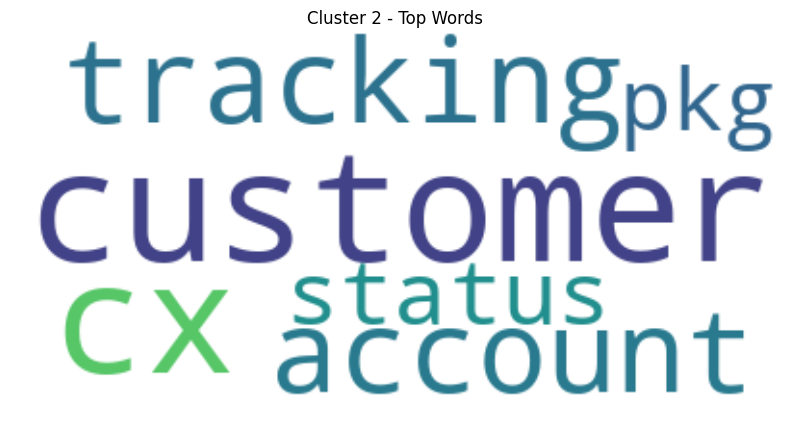

In [ ]:
# Perform K-Means clustering with the best number of clusters using PCA-transformed data
best_num_clusters = 3  # Set the best number of clusters
kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_pca)

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Inverse transform PCA to get TF-IDF vectors for each comment
X_inverse = pca.inverse_transform(X_pca)
feature_names = vectorizer.get_feature_names_out()

# Create word clouds for each cluster
for cluster_id in range(best_num_clusters):
    cluster_comments = data[data['Cluster'] == cluster_id]['Comment']
    cluster_tfidf = X_inverse[data['Cluster'] == cluster_id]
    cluster_tfidf_sum = cluster_tfidf.sum(axis=0)
    sorted_indices = cluster_tfidf_sum.argsort()[::-1]  # Remove [0]
    top_words = [feature_names[idx] for idx in sorted_indices[:10]]  # Top 10 words

wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(top_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f"Cluster {cluster_id} - Top Words")
plt.axis('off')
plt.show()

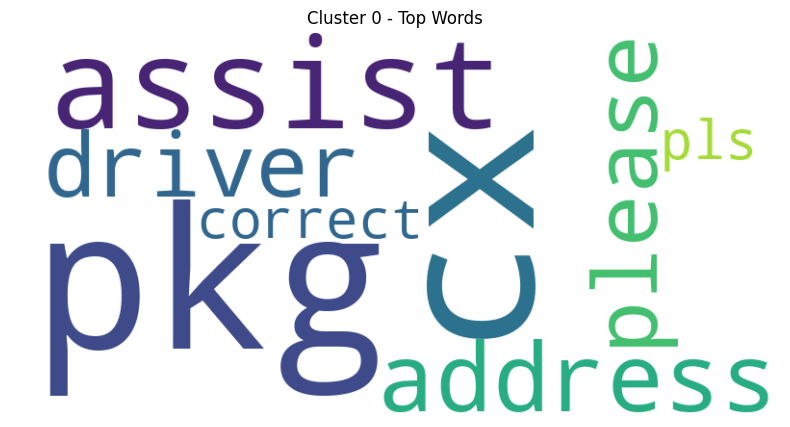

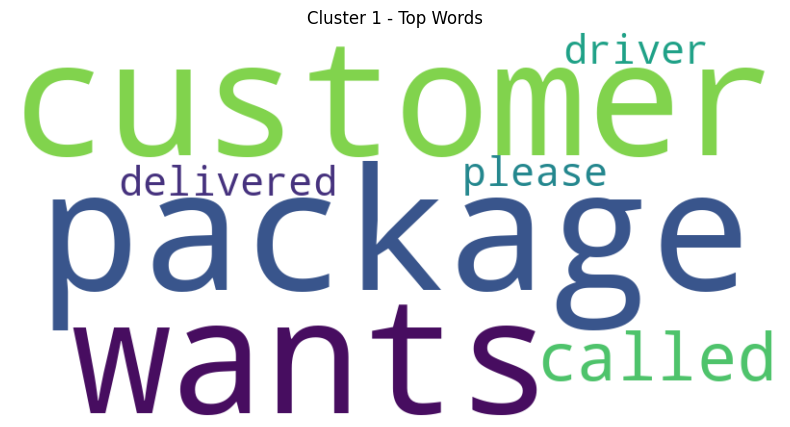

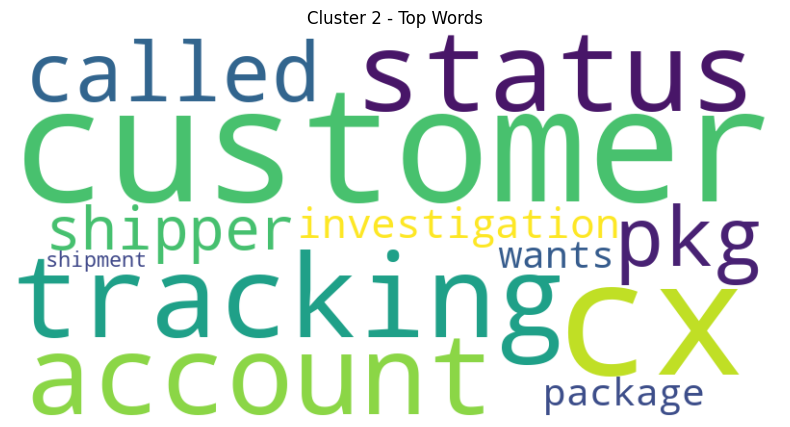

In [ ]:
# Create word clouds for each cluster
for cluster_id in range(best_num_clusters):
    cluster_comments = data[data['Cluster'] == cluster_id]['Comment']
    cluster_tfidf = X_inverse[data['Cluster'] == cluster_id]
    cluster_tfidf_sum = cluster_tfidf.sum(axis=0)
    sorted_indices = cluster_tfidf_sum.argsort()[::-1]

    # Select more words for visualization
    num_words_to_visualize = min(20, len(sorted_indices))  # Visualize up to 20 words
    top_words = [feature_names[idx] for idx in sorted_indices[:num_words_to_visualize]]

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_id} - Top Words")
    plt.axis('off')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
!pip install transformers
from transformers import pipeline
# Extractive Summarization using BERT
summarizer = pipeline("summarization")

# Perform K-Means clustering (as before) to group similar comments

# Apply PCA (as before) to reduce dimensionality

# Perform K-Means clustering (as before) on the PCA-transformed data

# Extractive Summarization
for cluster_id in range(best_num_clusters):
    cluster_comments = data[data['Cluster'] == cluster_id]['Comment']
    summarized_comments = []

for comment in cluster_comments:
        summary = summarizer(comment, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
        summarized_comments.append(summary)

    # Add summarized comments to the DataFrame
data.loc[data['Cluster'] == cluster_id, 'Summary'] = summarized_comments

# Export the DataFrame with summaries to a new CSV file
output_csv_path = "/content/output_clusters_with_summaries.csv"  # Change the output path as needed
df.to_csv(output_csv_path, index=False)

print(f"Clustered comments with summaries exported to {output_csv_path}")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Your max_length is set to 150, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


ValueError: ignored